# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import talib
import yfinance as yf
import nltk
import pynance as pn

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Antifragile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antifragile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
import os
print(os.getcwd())

c:\Users\Antifragile\Documents\stock-analysis\notebooks


# Load and prepare data

In [5]:
GOOG_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\GOOG_historical_data.csv', parse_dates=['Date'])
GOOG_data.set_index('Date', inplace=True)
GOOG_data.columns = GOOG_data.columns.str.lower()  # <-- Add this line

In [115]:
import pandas as pd

# Load all CSVs into separate DataFrames
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
dfs = {}

for ticker in tickers:
    df = aapl_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\GOOG_historical_data.csv', parse_dates=['Date'])
    df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
    df.sort_values("Date", inplace=True)
    df.reset_index(drop=True, inplace=True)
    dfs[ticker] = df


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_12360\702164810.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Date", inplace=True)
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_12360\702164810.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Date", inplace=True)
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_12360\702164810.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_

In [117]:
# Inspect the index 
print(GOOG_data.index)

# Inspect the columns
print(GOOG_data.columns)

# Select only the last 10 observations of `Close`
ts = GOOG_data['close'][-10:]

# Check the type of `ts` 
type(ts)

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2024-07-17', '2024-07-18', '2024-07-19', '2024-07-22',
               '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26',
               '2024-07-29', '2024-07-30'],
              dtype='datetime64[ns]', name='Date', length=5020, freq=None)
Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'dividends',
       'stock splits'],
      dtype='object')


pandas.core.series.Series

In [6]:
GOOG_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\GOOG_historical_data.csv', parse_dates=['Date'])
GOOG_data.set_index('Date', inplace=True)

In [118]:
# Ensure required columns
for df in [GOOG_data]:
    df.columns = df.columns.str.lower()  # Normalize column names
    required_cols = ['open', 'high', 'low', 'close', 'volume']  # 'date' removed
    assert all(col in df.columns for col in required_cols), f"Missing columns in {df}"

In [119]:

# Load data and set Date as index (do this only once)
GOOG_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\GOOG_historical_data.csv', parse_dates=['Date'])
GOOG_data.set_index('Date', inplace=True)

# Inspect the first rows of November-December 2006
print(GOOG_data.loc['2006-11-01':'2006-12-31'].head())

# Inspect the first rows of 2007 
print(GOOG_data.loc['2007'].head())

# Inspect November 2006 by integer location (if needed)
print(GOOG_data.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(GOOG_data.loc['2006-11-01':'2006-12-31'][['Open', 'Close']].head())
print(GOOG_data.loc['2007'][['Open', 'Close']].head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2006-11-01  11.924305  11.933520  11.588065  11.643856  11.630621  217865564   
2006-11-02  11.643856  11.799024  11.615961  11.703881  11.690578  210253137   
2006-11-03  11.761664  11.799522  11.583084  11.750955  11.737597  197043811   
2006-11-06  11.800021  11.946721  11.764155  11.879224  11.865721  200408375   
2006-11-07  11.879224  11.930781  11.750207  11.770133  11.756754  196618221   

            Dividends  Stock Splits  
Date                                 
2006-11-01        0.0           0.0  
2006-11-02        0.0           0.0  
2006-11-03        0.0           0.0  
2006-11-06        0.0           0.0  
2006-11-07        0.0           0.0  
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2007-01-03  1

In [120]:
# Sample 20 rows
sample = GOOG_data.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = GOOG_data.resample('ME').mean()
print(monthly_aapl)



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-04-12   15.998783   16.267525   15.946728   16.214474   16.196043   
2013-03-07   20.773636   20.837397   20.662054   20.737272   20.713701   
2021-02-03  103.650002  105.824997  100.918999  103.503502  103.385857   
2005-02-15    4.821926    4.977344    4.808975    4.862524    4.856997   
2021-12-07  145.949997  148.300003  145.702499  148.036499  147.868225   
2011-02-28   15.193053   15.354697   15.143488   15.277735   15.260369   
2006-08-08    9.534761    9.576605    9.441860    9.489431    9.478645   
2021-11-02  144.809402  146.920502  144.641006  145.863007  145.697205   
2009-08-10   11.336010   11.417455   11.302386   11.372623   11.359696   
2021-02-10  104.710503  105.418503  103.154503  104.768997  104.649910   
2015-06-09   26.378000   26.459999   26.150499   26.334499   26.304565   
2008-02-22   12.504630   12.677482   1

In [8]:
# Add a column `diff` to `GOOG` 
GOOG_data['diff'] = GOOG_data['open'] - GOOG_data['close']

# Delete the new `diff` column
del GOOG_data['diff']

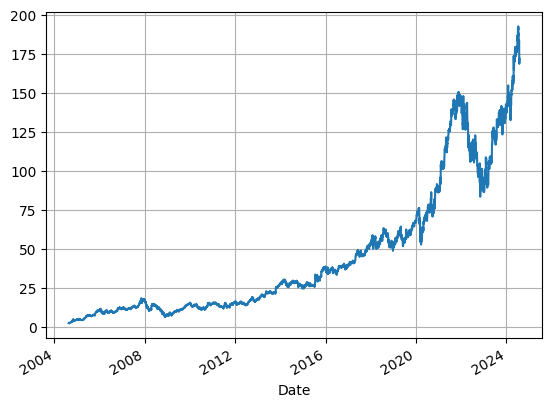

In [ ]:
# Plot the closing prices for `GOOG`
GOOG_data['close'].plot(grid=True)

# Show the plot
plt.show()

In [24]:
# Assign `Adj Close` to `daily_close`
daily_close = GOOG_data[['adj close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            adj close
Date                 
2004-08-19   0.000000
2004-08-20   0.079430
2004-08-23   0.010064
2004-08-24  -0.041408
2004-08-25   0.010775
...               ...
2024-07-24  -0.050272
2024-07-25  -0.029879
2024-07-26  -0.002838
2024-07-29   0.014525
2024-07-30   0.004266

[5020 rows x 1 columns]
            adj close
Date                 
2004-08-19        NaN
2004-08-20   0.076433
2004-08-23   0.010013
2004-08-24  -0.042289
2004-08-25   0.010717
...               ...
2024-07-24  -0.051580
2024-07-25  -0.030334
2024-07-26  -0.002842
2024-07-29   0.014420
2024-07-30   0.004257

[5020 rows x 1 columns]


In [ ]:
# Resample `GOOG` to business months, take last observation as value 
monthly = GOOG_data.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `GOOG` to quarters, take the mean as value per quarter
quarter = GOOG_data.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_12360\2371454403.py:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly = GOOG_data.resample('BM').apply(lambda x: x[-1])
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_12360\2371454403.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = GOOG_data.resample('BM').apply(lambda x: x[-1])
C:\Users\Antifragile\AppData\Local\Temp\ipykernel_12360\2371454403.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarter = GOOG_data.resample("4M").mean()


,open,high,low,close,adj close,volume,dividends,stock splits
Date,,,,,,,,
2004-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,0.482997,0.478209,0.492553,0.488938,0.488938,0.245119,NaN,NaN
2005-04-30,0.229863,0.219617,0.230603,0.224047,0.224047,0.225164,NaN,NaN
2005-08-31,0.444357,0.443479,0.450556,0.450030,0.450030,0.016352,NaN,NaN
2005-12-31,0.301138,0.299308,0.300386,0.298443,0.298443,-0.200577,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-04-30,0.007664,0.008916,0.010541,0.012798,0.012798,0.152984,NaN,NaN
2023-08-31,0.255447,0.252355,0.257837,0.251989,0.251989,-0.186795,NaN,NaN
2023-12-31,0.095876,0.092319,0.096075,0.095373,0.095373,-0.128459,NaN,NaN


In [26]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            adj close
Date                 
2004-08-19        NaN
2004-08-20   0.079430
2004-08-23   0.010064
2004-08-24  -0.041408
2004-08-25   0.010775
...               ...
2024-07-24  -0.050272
2024-07-25  -0.029879
2024-07-26  -0.002838
2024-07-29   0.014525
2024-07-30   0.004266

[5020 rows x 1 columns]


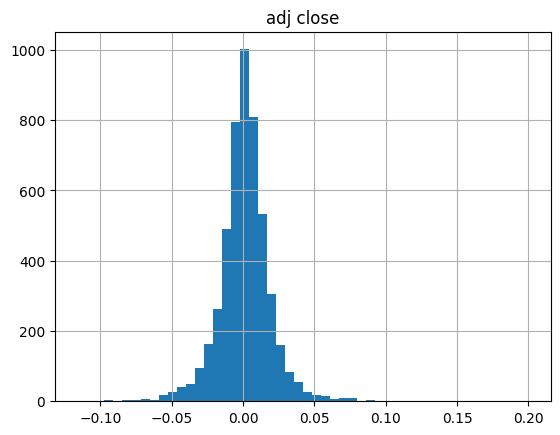

         adj close
count  5019.000000
mean      0.001029
std       0.019318
min      -0.116091
25%      -0.007854
50%       0.000802
75%       0.010138
max       0.199915


In [27]:

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [29]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            adj close
Date                 
2004-08-19        NaN
2004-08-20   1.079430
2004-08-23   1.090293
2004-08-24   1.045146
2004-08-25   1.056408
...               ...
2024-07-24  69.851592
2024-07-25  67.764500
2024-07-26  67.572211
2024-07-29  68.553671
2024-07-30  68.846103

[5020 rows x 1 columns]


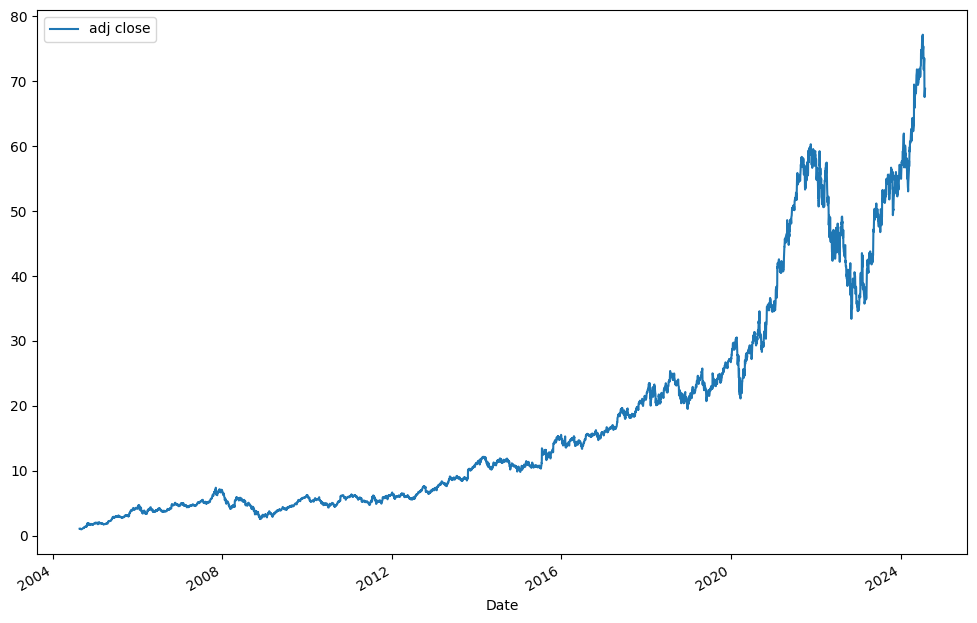

In [30]:
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [36]:
# Isolate the adjusted closing prices 
adj_close_px = GOOG_data['adj close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2024-07-17    181.189276
2024-07-18    181.213347
2024-07-19    181.214699
2024-07-22    181.353507
2024-07-23    181.571982
2024-07-24    181.527993
2024-07-25    181.311551
2024-07-26    181.098592
2024-07-29    181.042775
2024-07-30    180.995218
Name: adj close, dtype: float64

In [41]:
# Technical Indicators (TA-Lib)
GOOG_data['SMA20'] = talib.SMA(GOOG_data['close'], timeperiod=20)
GOOG_data['RSI'] = talib.RSI(GOOG_data['close'], timeperiod=14)
GOOG_data['MACD'], GOOG_data['MACD_signal'], GOOG_data['MACD_hist'] = talib.MACD(
    GOOG_data['close'], fastperiod=12, slowperiod=26, signalperiod=9
)


#Moving Windows

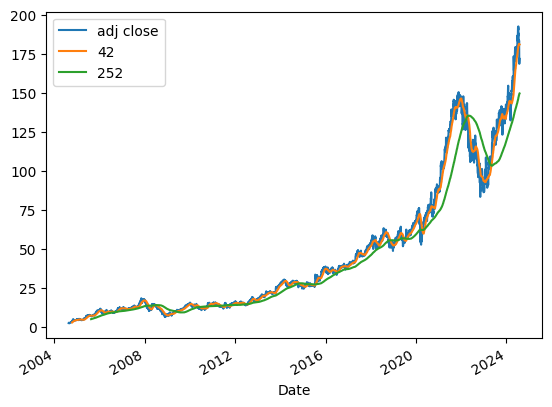

In [39]:
# Short moving window rolling mean
GOOG_data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
GOOG_data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
GOOG_data[['adj close', '42', '252']].plot()

plt.show()

#Plot Volatility

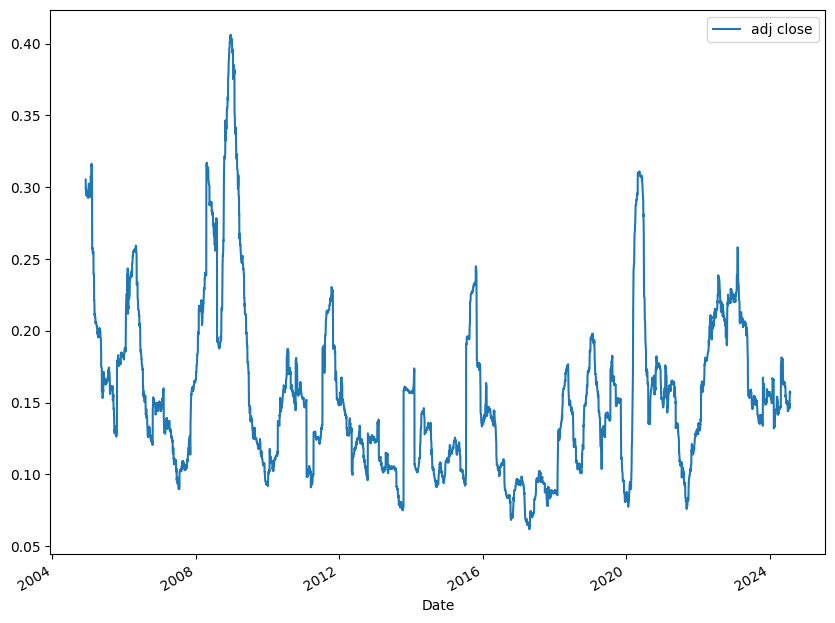

In [44]:
min_periods = 75 

# Calculate the volatility
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [14]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=GOOG_data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = GOOG_data['close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = GOOG_data['close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16324\660695898.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_16324\1408914315.py:14: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(signals.loc[signals.positions == 1.0].index,


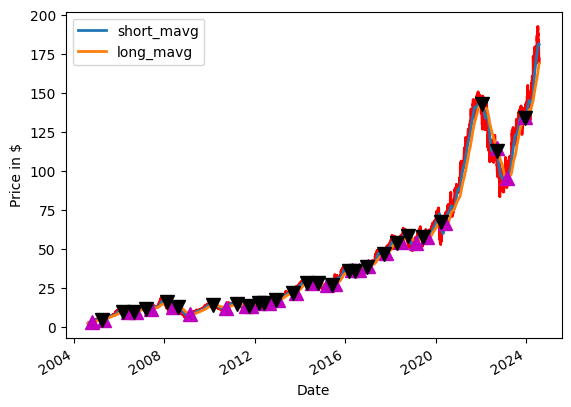

In [15]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
GOOG_data['close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

         

In [16]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['GOOG'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(GOOG_data['adj close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(GOOG_data['adj close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(GOOG_data['adj close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

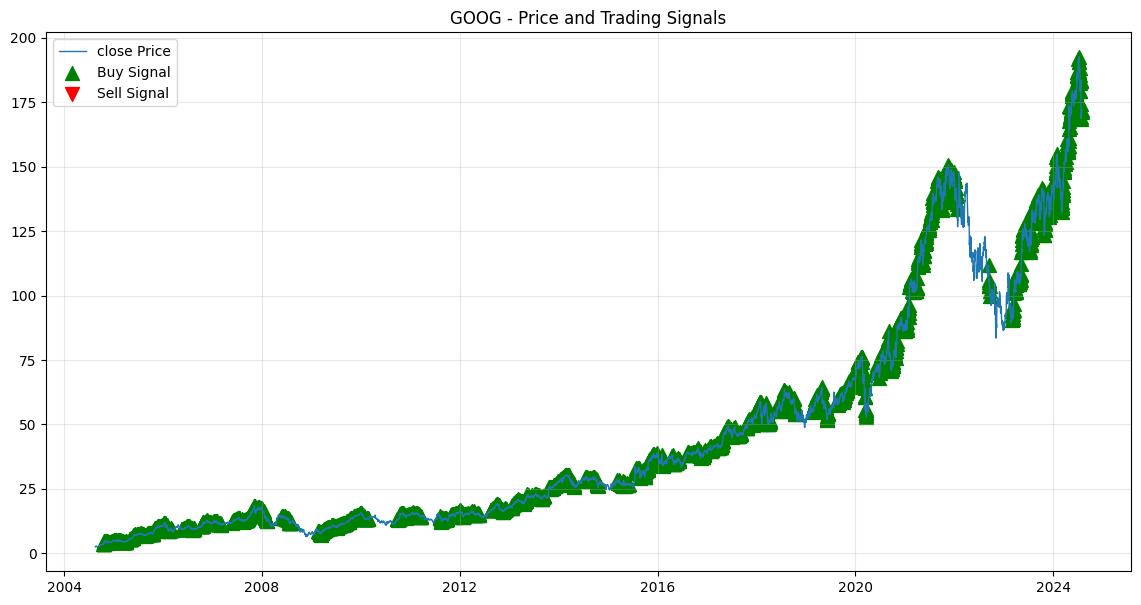

In [17]:
# Filter buy and sell signals
buy_signals = signals[signals['signal'] == 1]
sell_signals = signals[signals['signal'] == -1]

plt.figure(figsize=(14, 7))
plt.plot(GOOG_data.index, GOOG_data['close'], label='close Price', linewidth=1)

# Use GOOG_data for y-values, but only for indices present in both
plt.scatter(
    buy_signals.index, 
    GOOG_data.loc[buy_signals.index, 'close'], 
    color='green', marker='^', s=100, label='Buy Signal'
)
plt.scatter(
    sell_signals.index, 
    GOOG_data.loc[sell_signals.index, 'close'], 
    color='red', marker='v', s=100, label='Sell Signal'
)

plt.title('GOOG - Price and Trading Signals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Sharpe Ratio

In [100]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.4678203507449643


#Maximum Drawdown

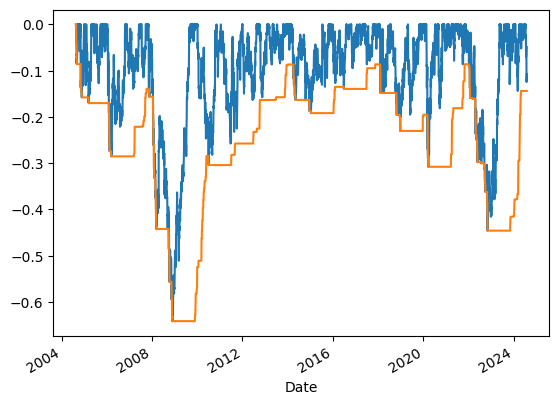

In [90]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = GOOG_data['adj close'].rolling(window, min_periods=1).max()
daily_drawdown = GOOG_data['adj close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()
# Show the plot
plt.show()

In [ ]:
# Get the number of days in `GOOG`
days = (GOOG_data.index[-1] - GOOG_data.index[0]).days

# Calculate the CAGR 
cagr = ((((GOOG_data['adj close'][-1]) / GOOG_data['adj close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.23145923478364927


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_12360\205373030.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((((GOOG_data['adj close'][-1]) / GOOG_data['adj close'][1])) ** (365.0/days)) - 1


#Plot MACD

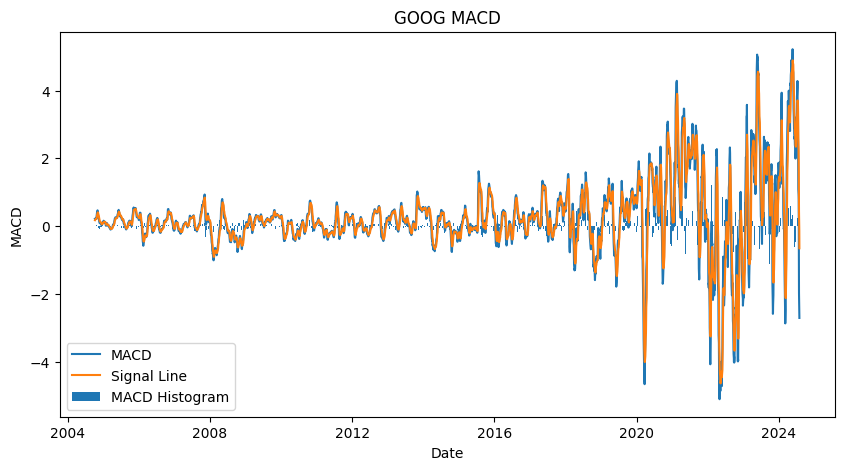

In [127]:
# Calculate MACD and store in lowercase columns
GOOG_data['macd'], GOOG_data['macd_signal'], GOOG_data['macd_hist'] = talib.MACD(
    GOOG_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Plot MACD
plt.figure(figsize=(10, 5))
plt.plot(GOOG_data.index, GOOG_data['macd'], label='MACD')
plt.plot(GOOG_data.index, GOOG_data['macd_signal'], label='Signal Line')
plt.bar(GOOG_data.index, GOOG_data['macd_hist'], label='MACD Histogram')
plt.title('GOOG MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

#Plot SMA

In [19]:
GOOG_data['sma20'] = talib.SMA(GOOG_data['close'], timeperiod=20)

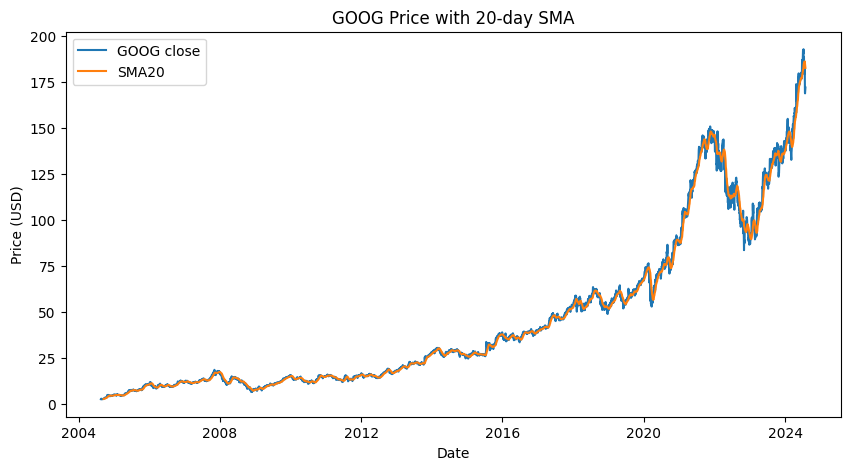

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(GOOG_data.index, GOOG_data['close'], label='GOOG close')
plt.plot(GOOG_data.index, GOOG_data['sma20'], label='SMA20')
plt.title('GOOG Price with 20-day SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Plot RSI

In [21]:
GOOG_data['RSI'] = talib.RSI(GOOG_data['close'], timeperiod=14)

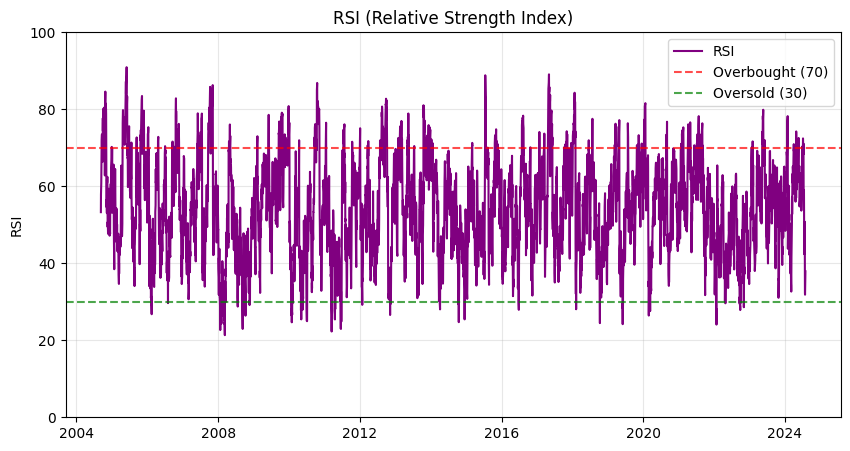

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(GOOG_data.index, GOOG_data['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
plt.title('RSI (Relative Strength Index)')
plt.ylabel('RSI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.show()

#Plot Bollinger

In [68]:
# Calculate Bollinger Bands (20-day window, 2 std)
window = 20
GOOG_data['SMA20'] = GOOG_data['Close'].rolling(window).mean()
GOOG_data['BB_Upper'] = GOOG_data['SMA20'] + 2 * GOOG_data['Close'].rolling(window).std()
GOOG_data['BB_Lower'] = GOOG_data['SMA20'] - 2 * GOOG_data['Close'].rolling(window).std()

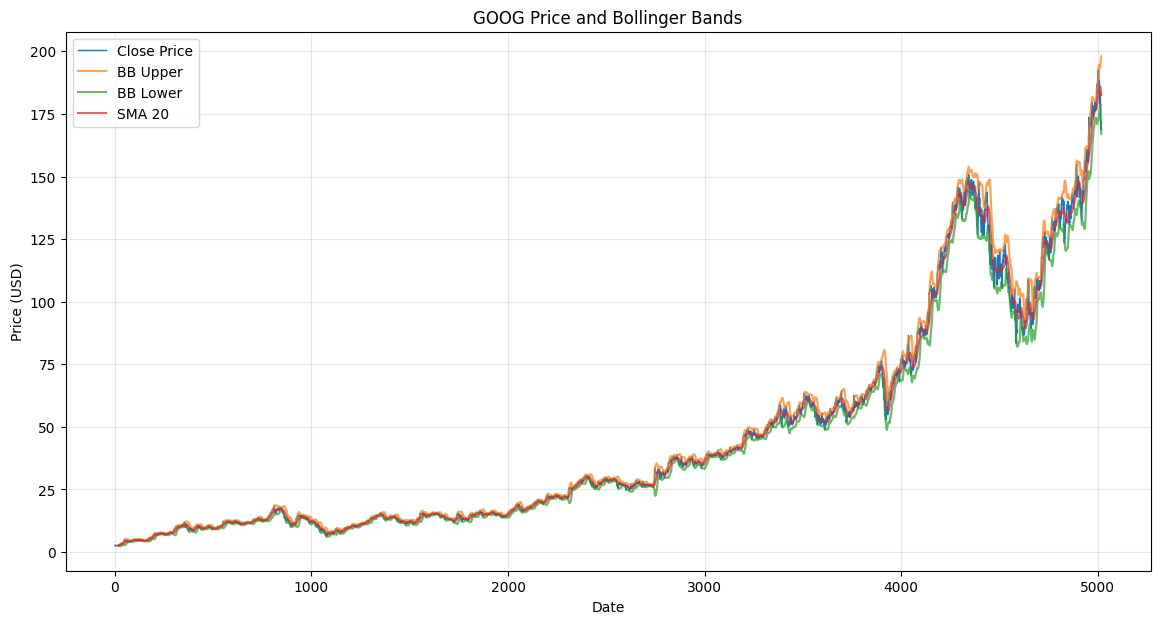

In [69]:
plt.figure(figsize=(14, 7))

# Plot Close price
plt.plot(GOOG_data.index, GOOG_data['Close'], label='Close Price', linewidth=1)

# Plot Bollinger Bands (make sure you have calculated these columns first)
plt.plot(GOOG_data.index, GOOG_data['BB_Upper'], label='BB Upper', alpha=0.7)
plt.plot(GOOG_data.index, GOOG_data['BB_Lower'], label='BB Lower', alpha=0.7)
plt.plot(GOOG_data.index, GOOG_data['SMA20'], label='SMA 20', alpha=0.7)

plt.fill_between(GOOG_data.index, GOOG_data['BB_Upper'], GOOG_data['BB_Lower'], alpha=0.1)

plt.title('GOOG Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()